In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

In [2]:
#loading required data
train = pd.read_csv('Housing_dataset_train.csv')
test = pd.read_csv('Housing_dataset_test.csv')
ss = pd.read_csv('Sample_submission.csv')
ss

,ID
0,845
1,1924
2,10718
3,12076
4,12254
...,...
5995,1594
5996,2416
5997,10195
5998,9455


In [3]:
train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [4]:
train.shape

(14000, 7)

In [5]:
test.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1


In [6]:
train.isna().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

In [7]:
#categorizing the features depending on their datatype and then calculating the number of them
# for train dataset
obj = (train.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables: ", len(object_cols))

int_ = (train.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Ineger variables: ", len(num_cols))

fl = (train.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables: ",len(fl_cols))

Categorical variables:  2
Ineger variables:  0
Float variables:  4


In [8]:
#categorizing the features depending on their datatype and then calculating the number of them
# for test dataset
obj = (test.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables: ", len(object_cols))

int_ = (test.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Ineger variables: ", len(num_cols))

fl = (test.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables: ",len(fl_cols))

Categorical variables:  2
Ineger variables:  0
Float variables:  0


<AxesSubplot:>

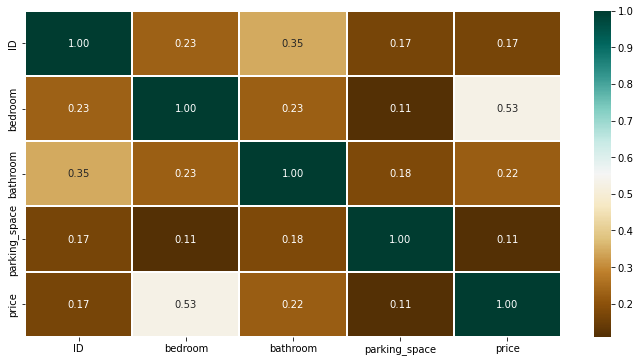

In [9]:
#EDA
#making heatmap to explore the train dataset
plt.figure(figsize=(12, 6))
sns.heatmap(train.corr(), cmap= 'BrBG', fmt = '.2f', linewidths = 2, annot = True)

<AxesSubplot:>

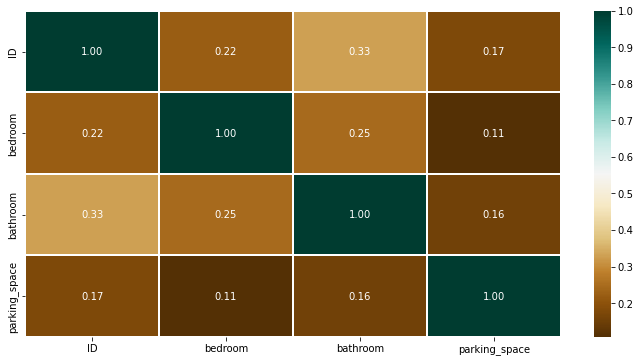

In [10]:
#EDA
#making heatmap to explore the test dataset
plt.figure(figsize=(12, 6))
sns.heatmap(test.corr(), cmap= 'BrBG', fmt = '.2f', linewidths = 2, annot = True)

<AxesSubplot:title={'center':'No. Unique values of Categorical Features'}>

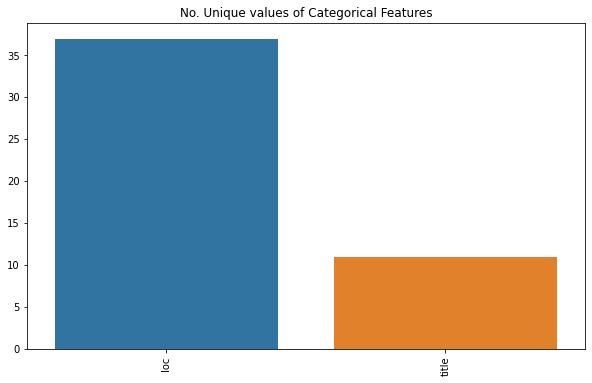

In [11]:
#trying another categorical feature using barplot for train dataset
unique_values = []
for col in object_cols:
    unique_values.append(train[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)


<AxesSubplot:title={'center':'No. Unique values of Categorical Features'}>

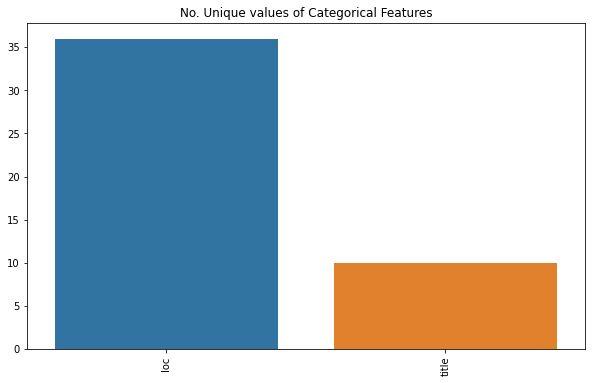

In [12]:
#trying another categorical feature using barplot for test dataset
unique_values = []
for col in object_cols:
    unique_values.append(test[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)


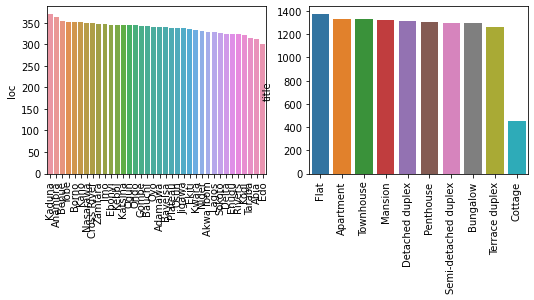

In [13]:
#finding out the actual count of each category using bargraph for train dataset
plt.figure(figsize=(18, 40))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
 
for col in object_cols:
    y = train[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

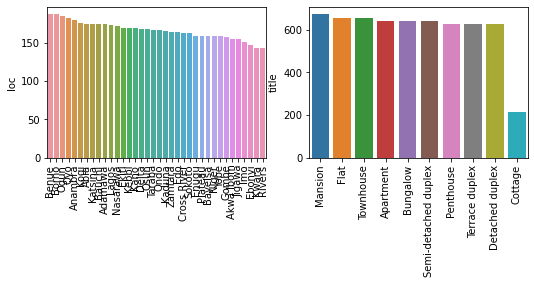

In [14]:
#finding out the actual count of each category using bargraph for test dataset
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
 
for col in object_cols:
    y = test[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

In [15]:
#cleaning the data
train.drop(['ID'], axis=1, inplace =True)

In [16]:
test.drop(['ID'], axis=1, inplace = True)

In [17]:
train['bedroom'] = train['bedroom'].fillna(train['bedroom'].mean())
train['bathroom'] = train['bathroom'].fillna(train['bathroom'].mean())
train['parking_space'] = train['parking_space'].fillna(train['parking_space'].mean())

In [18]:
train.head()

,loc,title,bedroom,bathroom,parking_space,price
0,Katsina,Semi-detached duplex,2.000000,2.0,1.000000,1149999.565
1,Ondo,Apartment,4.308171,2.0,4.000000,1672416.689
2,Ekiti,NaN,7.000000,5.0,3.169825,3364799.814
3,Anambra,Detached duplex,5.000000,2.0,4.000000,2410306.756
4,Kogi,Terrace duplex,4.308171,5.0,6.000000,2600700.898


In [19]:
test['bedroom'] = test['bedroom'].fillna(test['bedroom'].mean())
test['bathroom'] = test['bathroom'].fillna(test['bathroom'].mean())
test['parking_space'] = test['parking_space'].fillna(test['parking_space'].mean())

In [20]:
test.head()

,loc,title,bedroom,bathroom,parking_space
0,Kano,Penthouse,4,1,2
1,Adamawa,Apartment,2,2,4
2,Adamawa,Bungalow,2,7,2
3,Lagos,Mansion,9,5,2
4,Gombe,Semi-detached duplex,5,6,1


In [21]:
train= train.dropna()
train.isnull().sum()

loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
price            0
dtype: int64

In [22]:
test= test.dropna()
test.isnull().sum()

loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
dtype: int64

In [23]:
#one hot encoder for label categorical feature for train dataset
from sklearn.preprocessing import OneHotEncoder

s = (train.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',len(object_cols))


Categorical variables:
['loc', 'title']
No. of. categorical features:  2


In [24]:
# now using OneHotEncoder
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(train[object_cols]))
OH_cols.index = train.index
OH_cols.columns = OH_encoder.get_feature_names()
df_final = train.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)


In [25]:
#splitting the data set into train and test
X = df_final.drop(['price'], axis=1)
Y = df_final['price']

# Split the training set into
# training and validation set
X_train, X_test, Y_train, Y_test = train_test_split(
	X, Y, train_size=0.8, test_size=0.2, random_state=0)


In [26]:
# using SVM model
from sklearn.metrics import mean_absolute_percentage_error
model_SVR = svm.SVR()
model_SVR.fit(X_train, Y_train)
Y_pred = model_SVR.predict(X_test)
print(mean_squared_error(Y_test, Y_pred))

1176597031658.6565


In [27]:
#one hot encoder for label categorical feature for test dataset
# but firstly we collect all the features that have object datatype
from sklearn.preprocessing import OneHotEncoder

s = (test.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
	len(object_cols))

Categorical variables:
['loc', 'title']
No. of. categorical features:  2


In [28]:
# now using OneHotEncoder
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(test[object_cols]))
OH_cols.index = test.index
OH_cols.columns = OH_encoder.get_feature_names()
df = test.drop(object_cols, axis=1)
df = pd.concat([df, OH_cols], axis=1)

In [29]:
Y_pred = model_SVR.predict(df)
ss['PRICE'] = Y_pred
ss.head()

,ID,PRICE
0,845,1.887784e+06
1,1924,1.887453e+06
2,10718,1.887925e+06
3,12076,1.889139e+06
4,12254,1.888416e+06


In [30]:
ss.to_csv('submission 1.csv', index=False)

In [31]:
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_test)
 
mean_squared_error(Y_test, Y_pred)

193828562377.38712

In [32]:
Y_pred = model_RFR.predict(df)
ss['PRICE'] = Y_pred
ss.head()

,ID,PRICE
0,845,1.974177e+06
1,1924,1.016021e+06
2,10718,1.225531e+06
3,12076,8.694410e+06
4,12254,2.079147e+06


In [33]:
ss.to_csv('submission 2.csv', index=False)

In [34]:
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_test)
 
print(mean_squared_error(Y_test, Y_pred))

207511219861.39795


In [35]:
Y_pred = model_LR.predict(df)
ss['PRICE'] = Y_pred
ss.head()

,ID,PRICE
0,845,2338928.0
1,1924,805744.0
2,10718,1163904.0
3,12076,6846064.0
4,12254,1849232.0


In [36]:
ss.to_csv('submission 3.csv', index=False)

In [37]:
cb_model = CatBoostRegressor()
cb_model.fit(X_train, Y_train)
preds = cb_model.predict(X_test)
 
cb_r2_score=r2_score(Y_test, preds)
cb_r2_score
mse = metrics.mean_squared_error(Y_test, preds)
print(('mean sqaured error: '),mse)

Learning rate set to 0.057334
0:	learn: 1037424.1326582	total: 180ms	remaining: 2m 59s
1:	learn: 1002935.2819097	total: 184ms	remaining: 1m 31s
2:	learn: 971049.3117430	total: 188ms	remaining: 1m 2s
3:	learn: 939936.8531679	total: 192ms	remaining: 47.8s
4:	learn: 912259.8161365	total: 197ms	remaining: 39.1s
5:	learn: 887267.9224820	total: 202ms	remaining: 33.4s
6:	learn: 861783.0284791	total: 206ms	remaining: 29.2s
7:	learn: 839816.6976708	total: 209ms	remaining: 26s
8:	learn: 819163.0963728	total: 213ms	remaining: 23.4s
9:	learn: 799774.6217163	total: 216ms	remaining: 21.4s
10:	learn: 780791.5351825	total: 220ms	remaining: 19.8s
11:	learn: 764243.8822310	total: 224ms	remaining: 18.4s
12:	learn: 747826.4137462	total: 227ms	remaining: 17.3s
13:	learn: 732973.7350227	total: 231ms	remaining: 16.3s
14:	learn: 719905.3447371	total: 234ms	remaining: 15.4s
15:	learn: 706472.2306989	total: 237ms	remaining: 14.6s
16:	learn: 694979.6674397	total: 241ms	remaining: 13.9s
17:	learn: 683603.0504152	

In [38]:
preds = cb_model.predict(df)
ss['PRICE'] = preds
ss.head()

,ID,PRICE
0,845,2.268328e+06
1,1924,1.019988e+06
2,10718,1.275976e+06
3,12076,8.411828e+06
4,12254,1.869674e+06


In [39]:
ss.to_csv('submission 4.csv', index=False)

In [40]:
from xgboost import XGBRegressor
xg_model = XGBRegressor()
xg_model.fit(X_train, Y_train)
pred = xg_model.predict(df)
print(pred)

[2336347.  1028452.9  892173.1 ... 1929279.8 1250181.  3504157.2]


In [41]:
ss['PRICE'] = pred
ss.head()

,ID,PRICE
0,845,2336347.000
1,1924,1028452.875
2,10718,892173.125
3,12076,8430762.000
4,12254,1787705.875


In [42]:
ss.to_csv('submission 5.csv', index=False)